# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

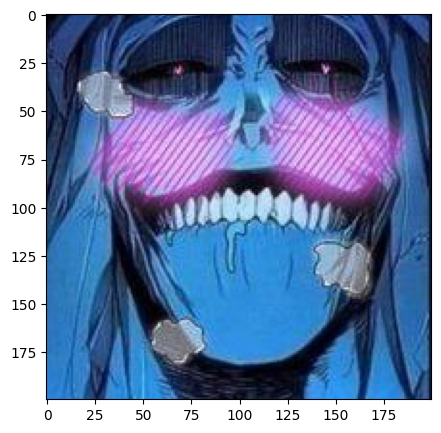

In [5]:
img = cv2.imread('heh.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<Axes: >, <matplotlib.image.AxesImage at 0x1e5ef09c530>)

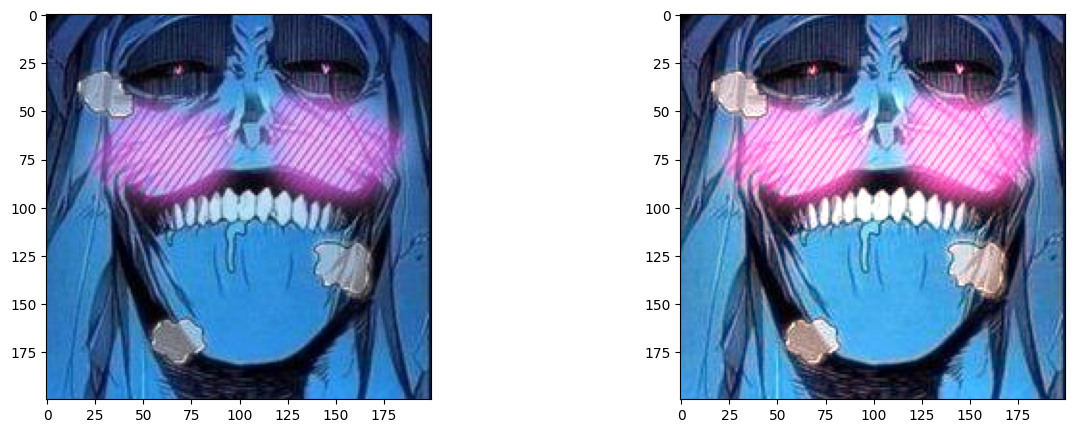

In [6]:
# Define white patch and the coefficients
row, col = 100, 115
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

(<Axes: >, <matplotlib.image.AxesImage at 0x1e5edd77530>)

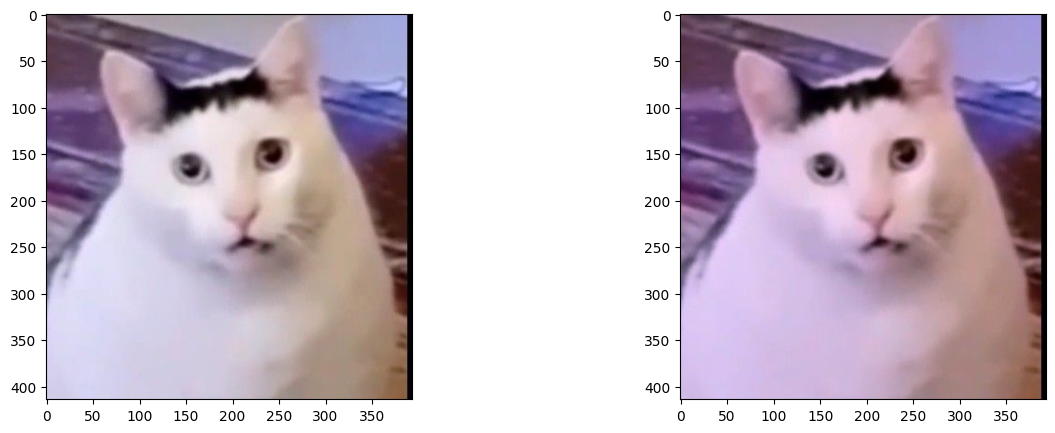

In [7]:
# Load your image
img = cv2.imread('huh.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = img[:, :, 0].mean()
mean_g = img[:, :, 1].mean()
mean_b = img[:, :, 2].mean()

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
brightest_channel = np.max([mean_r, mean_g, mean_b])
kr = mean_r/brightest_channel
kg = mean_g/brightest_channel
kb = mean_b/brightest_channel

# Apply color balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for koef, channel in zip([kr, kg, kb], range(3)):
    balanced[:,:, channel] = img[:,:, channel] * koef
balanced = balanced/255
balanced[balanced > 1] = 1

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

(<Axes: >, <matplotlib.image.AxesImage at 0x1e5f1aee000>)

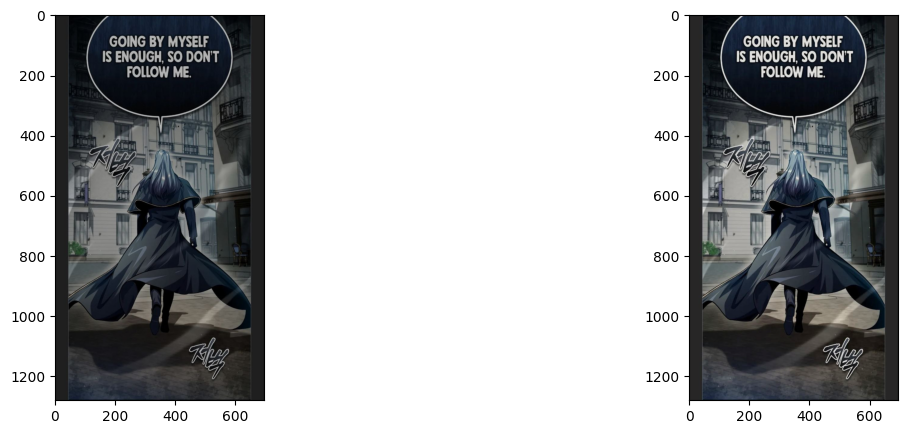

In [8]:
# Load your image
img = cv2.imread('crush.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = img[:,:,0].max()
max_g = img[:,:,1].max()
max_b = img[:,:,2].max()

# Apply scale-by-max balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for i, max_val in enumerate([max_r, max_g, max_b]):
    balanced[:,:,i] = img[:,:,i]/max_val

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)